In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 

In [2]:
data = pd.read_csv('/heart.csv')
data.dropna(axis=1, inplace=True )
data.reset_index(drop=True, inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2d4d5a4d0>,
      dtype=object)

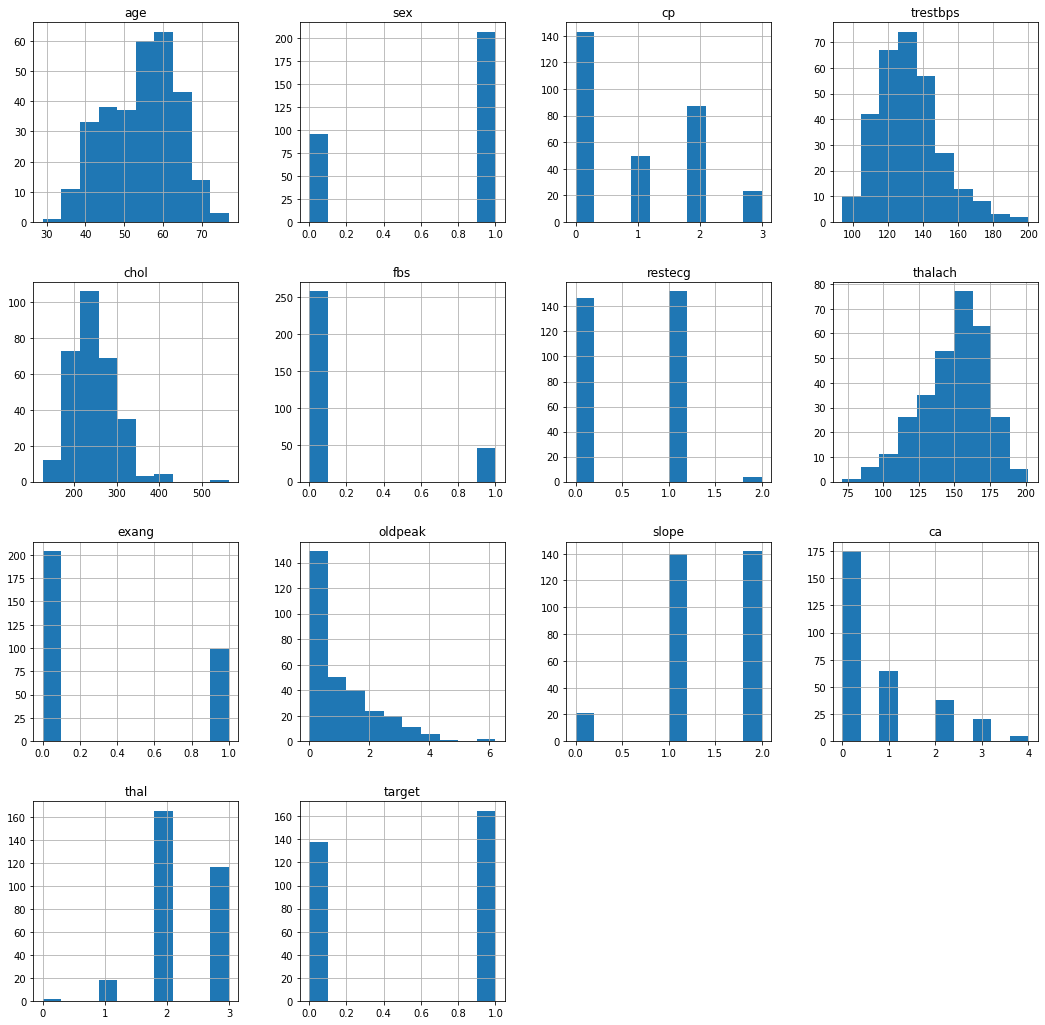

In [5]:
data.hist(figsize=(18, 18))

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data_subset = data.iloc[:, :5]
data_subset.head()

,age,sex,cp,trestbps,chol
0,63,1,3,145,233
1,37,1,2,130,250
2,41,0,1,130,204
3,56,1,1,120,236
4,57,0,0,120,354


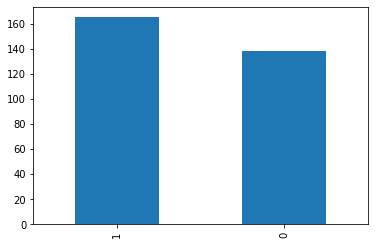

In [15]:
data['target'].value_counts().plot(kind='bar')

#### From the above bar chart, it is clear that there is a certain imbalance in the data, but given the size of the dataset, this imbalance is insignificant and can be considered as balanced.

In [8]:
for column in data_subset.columns:
    print(f'Statistical description of \'{column}\' attribute ')
    print(f'Minimun {column} of the all records is:', min(data_subset[column]))
    print(f'Maximum {column} of the all records is:', max(data_subset[column]))
    print(f'Mean {column} of the all records is:', np.mean(data_subset[column]))
    print(f'Median {column} of the all records is:', np.median(data_subset[column]))
    print(f'Standard deviation of the {column} attribute is:', np.std(data_subset[column]))
    print(f'25th percentile of {column} attribute is:', np.percentile(data_subset[column], 25))
    print(f'75th percentile of {column} attribute is:', np.percentile(data_subset[column], 75))
    print()
    print('---------------------------------------------------------------------------------------------------------')
    print()

Statistical description of 'age' attribute 
Minimun age of the all records is: 29
Maximum age of the all records is: 77
Mean age of the all records is: 54.366336633663366
Median age of the all records is: 55.0
Standard deviation of the age attribute is: 9.067101638577872
25th percentile of age attribute is: 47.5
75th percentile of age attribute is: 61.0

---------------------------------------------------------------------------------------------------------

Statistical description of 'sex' attribute 
Minimun sex of the all records is: 0
Maximum sex of the all records is: 1
Mean sex of the all records is: 0.6831683168316832
Median sex of the all records is: 1.0
Standard deviation of the sex attribute is: 0.46524119304834705
25th percentile of sex attribute is: 0.0
75th percentile of sex attribute is: 1.0

---------------------------------------------------------------------------------------------------------

Statistical description of 'cp' attribute 
Minimun cp of the all records is

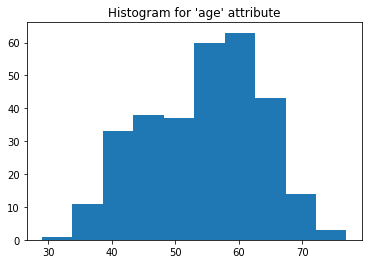

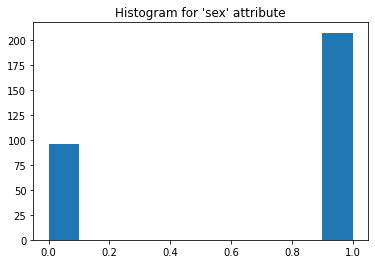

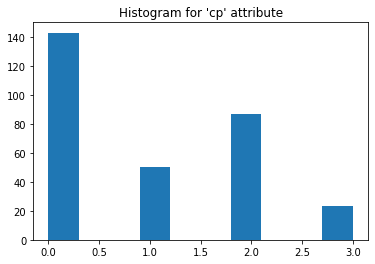

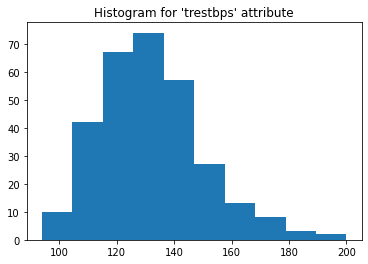

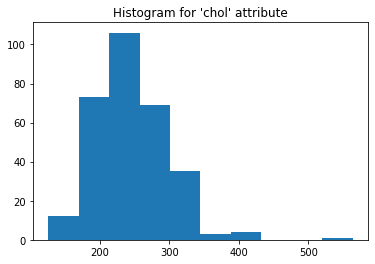

In [23]:
for column in data_subset.columns:
    plt.title(f'Histogram for \'{column}\' attribute')
    plt.hist(data_subset[column])
    plt.show()

#### From the histograms of 'age', 'trestbps', and 'chol' it is evident that
- the age of the patients is left skewed- which means that most of the patients are elderly. 
- the resting blood pressure of most patients is clustered near the 130-135 range which means most patients do not have sever blood pressure issues.
- the cholesterol of most patients are centered in the 230-240 range, and considering the mean age of most patients is above 50, that is not more or less normal.

In [25]:
import plotly.express as px
fig = px.imshow(data_subset.corr())
fig.show()

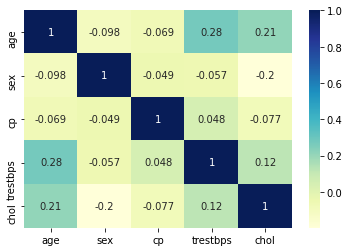

In [31]:
import seaborn as sns

sns.heatmap(data_subset.corr(), annot=True, cmap='YlGnBu')

#### From the above heatmaps, it is abundantly clear that there is almost no correlation between the chosen attributes of the dataset.